In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr, spearmanr
import requests

In [4]:
# Step 1: Download the data using requests
url_male = "https://github.com/gagolews/teaching-data/raw/master/marek/nhanes_adult_male_bmx_2020.csv"
url_female = "https://github.com/gagolews/teaching-data/raw/master/marek/nhanes_adult_female_bmx_2020.csv"

In [5]:
response_male = requests.get(url_male)
response_female = requests.get(url_female)

with open("nhanes_adult_male_bmx_2020.csv", 'wb') as file:
    file.write(response_male.content)

with open("nhanes_adult_female_bmx_2020.csv", 'wb') as file:
    file.write(response_female.content)

In [7]:
# Step 2: Read the files as numpy matrices
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)

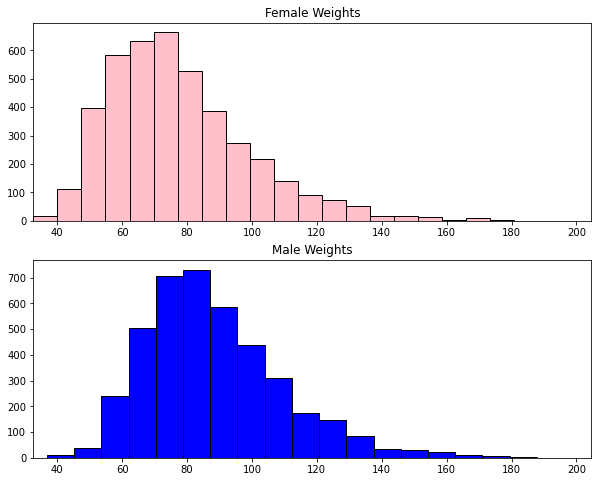

In [9]:
# Step 3: Draw histograms for female and male weights
# Remove rows with NaN or Inf values
male = male[np.isfinite(male).all(axis=1)]
female = female[np.isfinite(female).all(axis=1)]
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].hist(female[:, 0], bins=20, color='pink', edgecolor='black')
axs[0].set_title('Female Weights')
axs[1].hist(male[:, 0], bins=20, color='blue', edgecolor='black')
axs[1].set_title('Male Weights')

# Set identical x-axis limits
xmin = min(np.min(female[:, 0]), np.min(male[:, 0]))
xmax = max(np.max(female[:, 0]), np.max(male[:, 0]))
for ax in axs:
    ax.set_xlim([xmin, xmax])
plt.show()

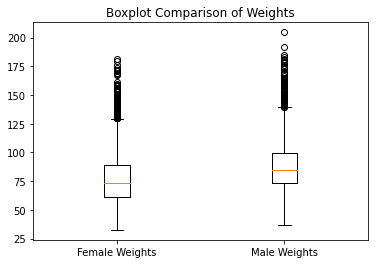

In [10]:
# Step 4: Box-and-whisker plot for male and female weights
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female Weights', 'Male Weights'])
plt.title('Boxplot Comparison of Weights')
plt.show()

In [11]:
# Step 5: Compute basic numerical aggregates
female_weight_stats = {
    'mean': np.mean(female[:, 0]),
    'median': np.median(female[:, 0]),
    'std_dev': np.std(female[:, 0]),
    'variance': np.var(female[:, 0]),
    'skewness': skew(female[:, 0]),
    'kurtosis': kurtosis(female[:, 0])
}

male_weight_stats = {
    'mean': np.mean(male[:, 0]),
    'median': np.median(male[:, 0]),
    'std_dev': np.std(male[:, 0]),
    'variance': np.var(male[:, 0]),
    'skewness': skew(male[:, 0]),
    'kurtosis': kurtosis(male[:, 0])
}

print("Female Weight Stats:", female_weight_stats)
print("Male Weight Stats:", male_weight_stats)

Female Weight Stats: {'mean': 77.40379057095475, 'median': 73.6, 'std_dev': 21.54250829019315, 'variance': 464.07966343304065, 'skewness': 1.03336107186799, 'kurtosis': 1.4009683480659731}
Male Weight Stats: {'mean': 88.36454300416565, 'median': 85.0, 'std_dev': 21.418936717962495, 'variance': 458.770850128082, 'skewness': 0.9842810741662347, 'kurtosis': 1.4742884754078238}


In [12]:
# Step 6: Add BMI to female matrix
bmi_female = female[:, 0] / (female[:, 1] / 100) ** 2
female = np.column_stack((female, bmi_female))

In [13]:
# Step 7: Standardize the female matrix
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)

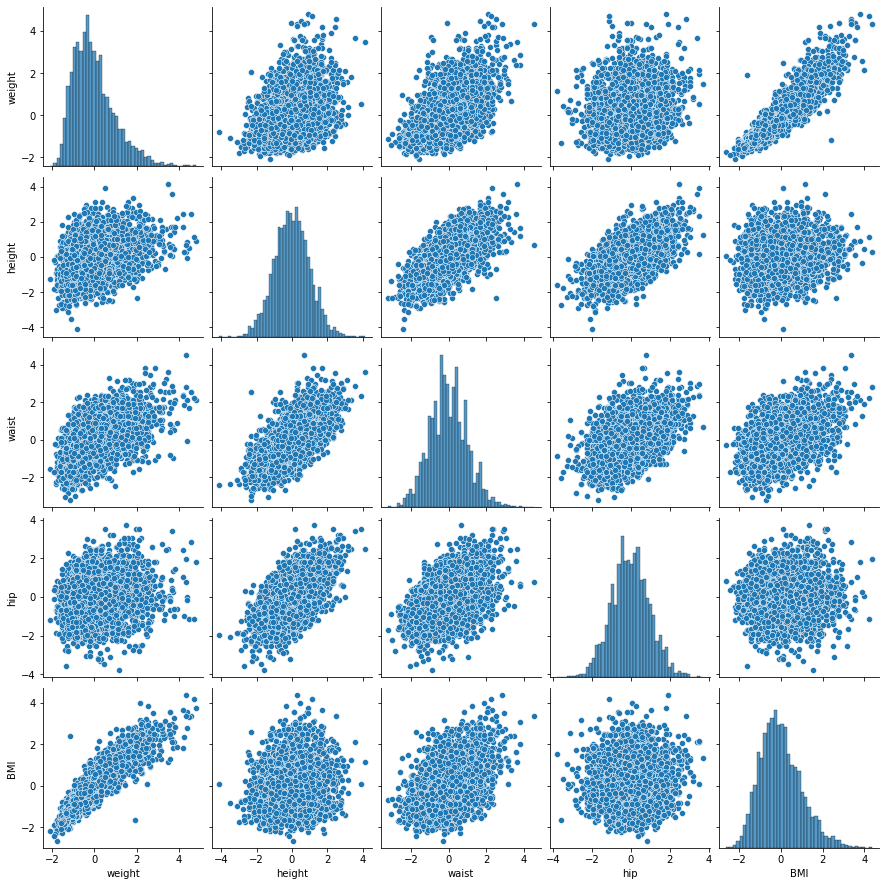

Pearson Correlation:
           weight    height     waist       hip       BMI
weight  1.000000  0.345496  0.551563  0.193186  0.905385
height  0.345496  1.000000  0.667911  0.657202  0.151955
waist   0.551563  0.667911  1.000000  0.475645  0.453122
hip     0.193186  0.657202  0.475645  1.000000  0.079876
BMI     0.905385  0.151955  0.453122  0.079876  1.000000
Spearman Correlation:
           weight    height     waist       hip       BMI
weight  1.000000  0.338860  0.541501  0.195821  0.913913
height  0.338860  1.000000  0.665128  0.647010  0.144841
waist   0.541501  0.665128  1.000000  0.464221  0.423957
hip     0.195821  0.647010  0.464221  1.000000  0.076482
BMI     0.913913  0.144841  0.423957  0.076482  1.000000


In [14]:
# Step 8: Draw a scatterplot matrix for standardised female data
features = ['weight', 'height', 'waist', 'hip', 'BMI']
df_zfemale = pd.DataFrame(zfemale, columns=features + ['upper_arm_length', 'upper_leg_length', 'arm_circumference'])
sns.pairplot(df_zfemale[features])
plt.show()

# Compute Pearson's and Spearman's correlation coefficients
pearson_corr = df_zfemale[features].corr(method='pearson')
spearman_corr = df_zfemale[features].corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)

In [34]:
# Step 9: Compute waist-to-height and waist-to-hip ratios and add to matrices
male_waist_to_height = male[:, 6] / male[:, 1]
female_waist_to_height = female[:, 6] / female[:, 1]

male_waist_to_hip = male[:, 6] / male[:, 5]
female_waist_to_hip = female[:, 6] / female[:, 5]

male = np.column_stack((male, male_waist_to_height, male_waist_to_hip))
female = np.column_stack((female, female_waist_to_height, female_waist_to_hip))

In [35]:
# Verify the shape of the matrices
print("Male matrix shape:", male.shape)
print("Female matrix shape:", female.shape)

Male matrix shape: (4081, 11)
Female matrix shape: (4221, 12)


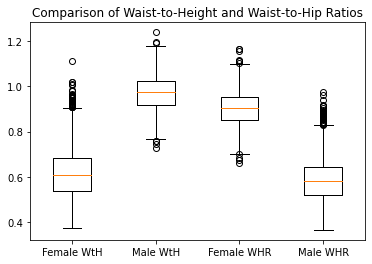

In [36]:
# Step 10: Box-and-whisker plot for waist-to-height and waist-to-hip ratios
plt.boxplot([female[:, 8], male[:, 8], female[:, 9], male[:, 9]], labels=['Female WtH', 'Male WtH', 'Female WHR', 'Male WHR'])
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.show()

In [37]:
# Step 11: Discuss BMI, waist-to-height ratio, and waist-to-hip ratio
discussion = """
BMI is widely used due to its simplicity and ease of calculation but does not distinguish between muscle and fat mass.
Waist-to-height ratio is better at indicating fat distribution and related health risks, especially cardiovascular diseases.
Waist-to-hip ratio is a good indicator of abdominal fat distribution and can be an effective measure of health risks, particularly in predicting metabolic complications.
"""
print(discussion)


BMI is widely used due to its simplicity and ease of calculation but does not distinguish between muscle and fat mass.
Waist-to-height ratio is better at indicating fat distribution and related health risks, especially cardiovascular diseases.
Waist-to-hip ratio is a good indicator of abdominal fat distribution and can be an effective measure of health risks, particularly in predicting metabolic complications.



In [39]:
# Step 12: Print standardised measurements for 5 lowest and 5 highest BMI
lowest_bmi_indices = np.argsort(zfemale[:, 7])[:5]
highest_bmi_indices = np.argsort(zfemale[:, 7])[-5:]

print("Lowest BMI Standardized Measurements:\n", zfemale[lowest_bmi_indices])
print("Highest BMI Standardized Measurements:\n", zfemale[highest_bmi_indices])

Lowest BMI Standardized Measurements:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]
Highest BMI Standardized Measurements:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 